In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
ftrain = pd.read_csv("fashion-mnist_train.csv", sep = ',')

In [35]:
ftest = pd.read_csv("fashion-mnist_test.csv", sep = ',')

In [36]:
ftrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
ftest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
ftrain.shape, ftest.shape

((60000, 785), (10000, 785))

In [39]:
training = np.array(ftrain, dtype="float32")

In [40]:
testing = np.array(ftest, dtype="float32")

5.0

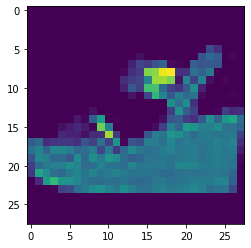

In [41]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

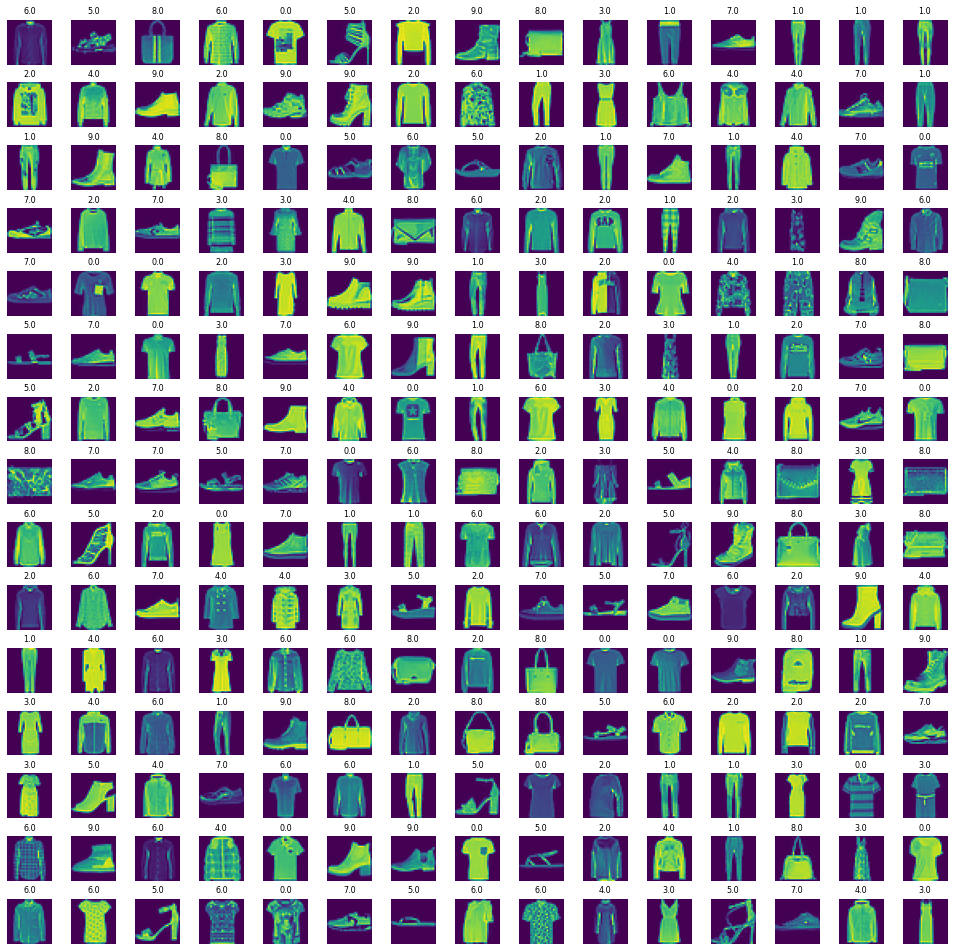

In [42]:
#Viewing the images in a matrix format

#The dimensions of the grid
W_grid = 15
L_grid = 15

#fig, axes = plt.subplot()(L_grid, W_grid)
#subplot return the figure object and axes of object
#we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() #flaten the 15 x 15 matrix into 255 array

n_training = len(training) #get the length of the training dataset

#Select a random number from 0 to n_training
for i in np.arange(0, L_grid * W_grid): #Create evenly spaced variables
    
    #Select a random number
    index = np.random.randint(0, n_training)
    #read and display an image from the selected index
    axes[i].imshow(training[index, 1:].reshape(28, 28))
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# Training a Model

In [43]:
xtrain = training[:, 1:]/255
ytrain = training[:, 0]

In [44]:
xtest = testing[:, 1:]/255
ytest = testing[:, 0]

In [45]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2, random_state=12345)

In [46]:
xtrain = xtrain.reshape(xtrain.shape[0], *(28, 28, 1))
xtest = xtest.reshape(xtest.shape[0], *(28, 28, 1))
xval = xval.reshape(xval.shape[0], *(28, 28, 1))

In [48]:
import keras

In [87]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [98]:
cnn_model = Sequential()

In [99]:
cnn_model.add(Conv2D(128, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [100]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [101]:
cnn_model.add(Flatten())

In [102]:
cnn_model.add(Dense(32, activation = 'relu'))

In [103]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [104]:
cnn_model.compile(loss = "sparse_categorical_crossentropy", optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [105]:
epochs = 50

In [106]:
cnn_model.fit(xtrain,
              ytrain,
              batch_size=512,
              epochs = 50,
              verbose=1,
              validation_data = (xval, yval))

Epoch 1/50
94/94 [==============================] - 4s 39ms/step - loss: 1.5492 - accuracy: 0.4988 - val_loss: 0.6388 - val_accuracy: 0.7711
Epoch 2/50
94/94 [==============================] - 3s 37ms/step - loss: 0.6074 - accuracy: 0.7775 - val_loss: 0.5298 - val_accuracy: 0.8090
Epoch 3/50
94/94 [==============================] - 4s 38ms/step - loss: 0.5230 - accuracy: 0.8092 - val_loss: 0.5028 - val_accuracy: 0.8182
Epoch 4/50
94/94 [==============================] - 4s 46ms/step - loss: 0.4762 - accuracy: 0.8271 - val_loss: 0.4642 - val_accuracy: 0.8373
Epoch 5/50
94/94 [==============================] - 5s 48ms/step - loss: 0.4496 - accuracy: 0.8371 - val_loss: 0.4535 - val_accuracy: 0.8371
Epoch 6/50
94/94 [==============================] - 4s 46ms/step - loss: 0.4334 - accuracy: 0.8420 - val_loss: 0.4298 - val_accuracy: 0.8461
Epoch 7/50
94/94 [==============================] - 4s 45ms/step - loss: 0.4182 - accuracy: 0.8483 - val_loss: 0.4177 - val_accuracy: 0.8503
Epoch 8/50
94

# Evaluating the Model

In [107]:
evaluation = cnn_model.evaluate(xtest, ytest)
print("Test Accuracy : {:.3f}".format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8818
Test Accuracy : 0.882


In [108]:
predicted_classes = cnn_model.predict_classes(xtest)

C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


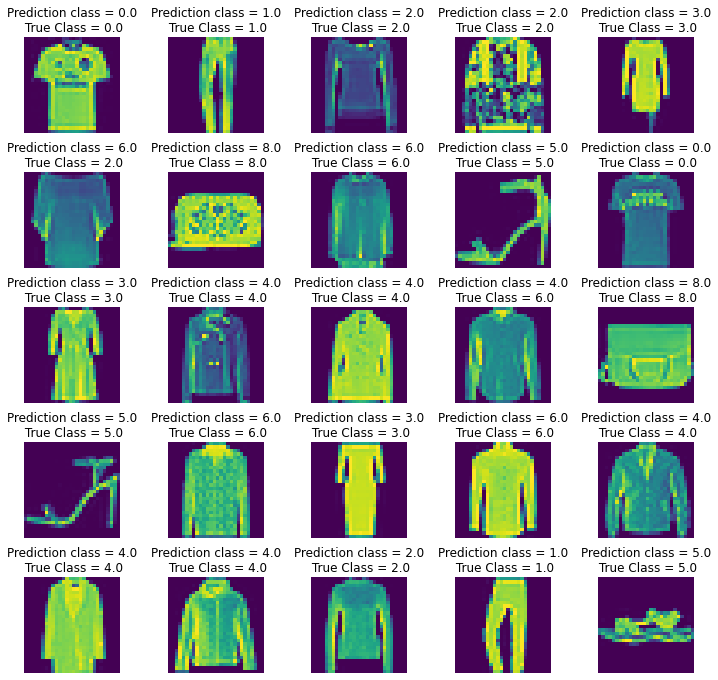

In [109]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(xtest[i].reshape(28, 28))
    axes[i].set_title("Prediction class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], ytest[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

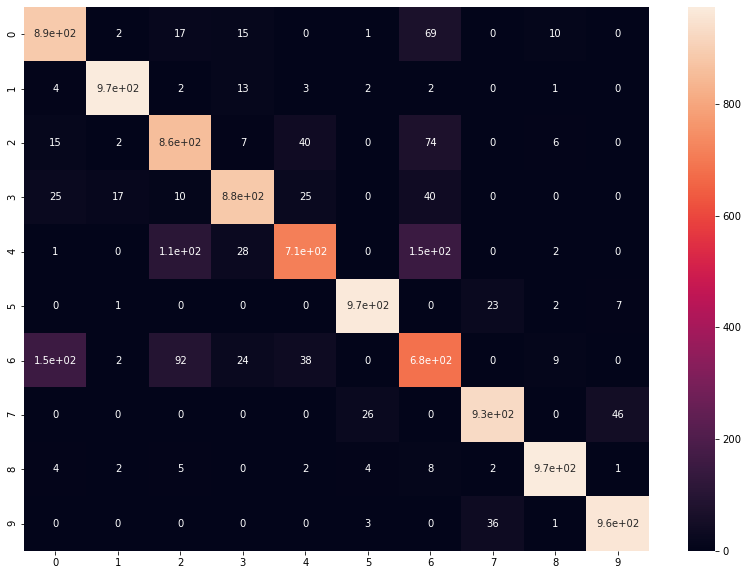

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)

In [112]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(ytest, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.89      0.85      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.78      0.86      0.82      1000
     Class 3       0.91      0.88      0.90      1000
     Class 4       0.87      0.71      0.78      1000
     Class 5       0.96      0.97      0.97      1000
     Class 6       0.67      0.68      0.67      1000
     Class 7       0.94      0.93      0.93      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

